# Imports

In [1]:
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt
import networkx as nx

# First Part

### 1.Reading and visualising the dataset file

In [2]:
dataset = pd.read_csv('Dataset.csv')
print(dataset.to_string())

    longitude  latitude  housing_median_age  total_rooms  population  median_income  median_house_value ocean_proximity
0     -122.23     37.88             41.0000          880         322         8.3252              452600        NEAR BAY
1     -122.23     37.88             41.0000          880         322         8.3252              452600        NEAR BAY
2     -122.22     37.86             21.0000         7099        2401         8.3014              358500        NEAR BAY
3     -122.25     37.84             52.0001         3104        1157         3.1200              241400        NEAR BAY
4     -122.26     37.85             52.0000         3503        1504         3.2705              241800        NEAR BAY
5     -121.65     39.32             40.0000          812         374         2.7891               73500          INLAND
6     -121.69     39.36             29.0000         2220        1170         2.3224               56200          INLAND
7     -121.70     39.37             32.0

### (2-6).Data Cleaning (Preprocessing)

2. Fix missing values

In [3]:
print('is there any null values?',dataset.isnull().values.any(), '\n') # Check if there is any null values
print(dataset.isnull().sum(),'\n') # Check which columns have null values
print(dataset.isnull().to_string()) # Check where the null values fall

is there any null values? True 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
median_income         1
median_house_value    0
ocean_proximity       1
dtype: int64 

    longitude  latitude  housing_median_age  total_rooms  population  median_income  median_house_value  ocean_proximity
0       False     False               False        False       False          False               False            False
1       False     False               False        False       False          False               False            False
2       False     False               False        False       False          False               False            False
3       False     False               False        False       False          False               False            False
4       False     False               False        False       False          False               False            False
5       False     False           

I have decided to set the missing value in ocean_proximity to INLAND as it falls between two INLAND values in terms of longitude.

In [4]:
dataset.at[11, 'ocean_proximity'] = str('INLAND')

I have decided to auto-generate a value for the missing median income value by finding the correlation to other columns.

In [5]:
print(dataset.corr().to_string()) # Find the correlation in the dataset

                    longitude  latitude  housing_median_age  total_rooms  population  median_income  median_house_value
longitude            1.000000 -0.951331            0.460223    -0.326288   -0.464498      -0.072013            0.551852
latitude            -0.951331  1.000000           -0.535713     0.257412    0.424459      -0.128513           -0.749265
housing_median_age   0.460223 -0.535713            1.000000    -0.298333   -0.411813       0.173745            0.469196
total_rooms         -0.326288  0.257412           -0.298333     1.000000    0.923021       0.202128           -0.081461
population          -0.464498  0.424459           -0.411813     0.923021    1.000000      -0.006953           -0.287138
median_income       -0.072013 -0.128513            0.173745     0.202128   -0.006953       1.000000            0.625799
median_house_value   0.551852 -0.749265            0.469196    -0.081461   -0.287138       0.625799            1.000000


The mdeian_income best correlates to the median_house_value column therefore I'll generate a random value between the corresponding values between both columns.

In [6]:
dataset.at[20,'median_income'] = rnd.uniform(2.5000,3.1200) #fill the null value with the random value

I know the value is not accurate but it is the most suitable way I found to generate the random value

3. Fix duplicates

In [7]:
# Check for duplicated rows
print(dataset.duplicated().to_string())

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27     True


In [8]:
# Remove duplicate rows
dataset1 = dataset.drop_duplicates()
print(dataset1.to_string())

    longitude  latitude  housing_median_age  total_rooms  population  median_income  median_house_value ocean_proximity
0     -122.23     37.88             41.0000          880         322       8.325200              452600        NEAR BAY
2     -122.22     37.86             21.0000         7099        2401       8.301400              358500        NEAR BAY
3     -122.25     37.84             52.0001         3104        1157       3.120000              241400        NEAR BAY
4     -122.26     37.85             52.0000         3503        1504       3.270500              241800        NEAR BAY
5     -121.65     39.32             40.0000          812         374       2.789100               73500          INLAND
6     -121.69     39.36             29.0000         2220        1170       2.322400               56200          INLAND
7     -121.70     39.37             32.0000         1852         911       1.788500               57000          INLAND
8     -121.70     39.36             46.0

In [9]:
# Reset the indices
dataset1.reset_index(drop=True, inplace=True)
print(dataset1.to_string())

    longitude  latitude  housing_median_age  total_rooms  population  median_income  median_house_value ocean_proximity
0     -122.23     37.88             41.0000          880         322       8.325200              452600        NEAR BAY
1     -122.22     37.86             21.0000         7099        2401       8.301400              358500        NEAR BAY
2     -122.25     37.84             52.0001         3104        1157       3.120000              241400        NEAR BAY
3     -122.26     37.85             52.0000         3503        1504       3.270500              241800        NEAR BAY
4     -121.65     39.32             40.0000          812         374       2.789100               73500          INLAND
5     -121.69     39.36             29.0000         2220        1170       2.322400               56200          INLAND
6     -121.70     39.37             32.0000         1852         911       1.788500               57000          INLAND
7     -121.70     39.36             46.0

4. Fix wrong data types

Obviously, housing_median_age should be an integer instead of a float

In [10]:
dataset1 = dataset1.astype({'housing_median_age': int})

5. Fix wrong values

ocean_proximity has 2 'Near O' values that should be 'Near Ocean' for consistency

In [11]:
dataset1.at[16,'ocean_proximity'] = str('NEAR OCEAN')
dataset1.at[17,'ocean_proximity'] = str('NEAR OCEAN')

In [12]:
print(dataset1.to_string()) #View the updated dataset

    longitude  latitude  housing_median_age  total_rooms  population  median_income  median_house_value ocean_proximity
0     -122.23     37.88                  41          880         322       8.325200              452600        NEAR BAY
1     -122.22     37.86                  21         7099        2401       8.301400              358500        NEAR BAY
2     -122.25     37.84                  52         3104        1157       3.120000              241400        NEAR BAY
3     -122.26     37.85                  52         3503        1504       3.270500              241800        NEAR BAY
4     -121.65     39.32                  40          812         374       2.789100               73500          INLAND
5     -121.69     39.36                  29         2220        1170       2.322400               56200          INLAND
6     -121.70     39.37                  32         1852         911       1.788500               57000          INLAND
7     -121.70     39.36                 

6. Save CSV file

In [13]:
dataset1.to_csv('Updated Dataset.csv')

### (7-9). Data Analysis for  the column 'median_house_value'

7. Mean

In [14]:
meanvalue = dataset1['median_house_value'].mean() # get the mean value of the column
print('The mean value of the "median_house_value" column is:',round(meanvalue,2))

The mean value of the "median_house_value" column is: 174730.77


8. Median

In [15]:
medianvalue = dataset1['median_house_value'].median() #get the median value of the column
print('The median value of the "median_house_value" column is:', int(medianvalue))

The median value of the "median_house_value" column is: 90200


9. Range

In [16]:
maxval = dataset1['median_house_value'].max()
minval = dataset1['median_house_value'].min()
print('The range of values in the "median_house_value" column is', maxval - minval)

The range of values in the "median_house_value" column is 396600


### 10. Currency Update

The values in median_income needs to be multiplied by 10000 to represent USD

In [17]:
dataset1['median_income'] = dataset1['median_income']*10000

Updating the column data type to be an integer instead of a float

In [18]:
dataset1 = dataset1.astype({'median_income': int})

### Entire Updated Data frame

In [19]:
print(dataset1.to_string())

    longitude  latitude  housing_median_age  total_rooms  population  median_income  median_house_value ocean_proximity
0     -122.23     37.88                  41          880         322          83252              452600        NEAR BAY
1     -122.22     37.86                  21         7099        2401          83013              358500        NEAR BAY
2     -122.25     37.84                  52         3104        1157          31200              241400        NEAR BAY
3     -122.26     37.85                  52         3503        1504          32705              241800        NEAR BAY
4     -121.65     39.32                  40          812         374          27891               73500          INLAND
5     -121.69     39.36                  29         2220        1170          23224               56200          INLAND
6     -121.70     39.37                  32         1852         911          17885               57000          INLAND
7     -121.70     39.36                 

# Second Part

### Part 1

In [20]:
A = np.random.randint(0,10,(5,10)) #Initialising the 2D array

In [21]:
print(A) #Displaying the array as a table

[[1 6 2 4 5 8 6 9 8 9]
 [1 9 1 3 8 5 2 0 1 3]
 [2 4 7 1 5 9 1 3 2 6]
 [8 1 7 3 1 1 5 0 3 5]
 [8 5 2 3 9 6 8 2 0 8]]


Plotting the first two rows on a single diagram

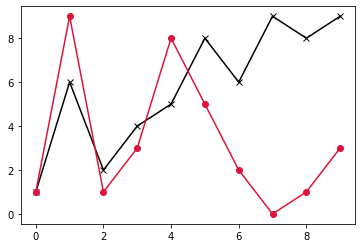

In [22]:
plt.plot(A[0,], marker='x', color='black') 
plt.plot(A[1,], marker='o', color='crimson')
plt.show()

### Part 2

Mean values for each individual row:

In [23]:
R = np.mean(A, axis=1)
print('1st Row Mean =', R[0])
print('2nd Row Mean =', R[1])
print('3rd Row Mean =', R[2])
print('4th Row Mean =', R[3])
print('5th Row Mean =', R[4])

1st Row Mean = 5.8
2nd Row Mean = 3.3
3rd Row Mean = 4.0
4th Row Mean = 3.4
5th Row Mean = 5.1


Median values for each individual row:

In [24]:
M = np.median(A, axis=1)
print('1st Row Median =', M[0])
print('2nd Row Median =', M[1])
print('3rd Row Median =', M[2])
print('4th Row Median =', M[3])
print('5th Row Median =', M[4])

1st Row Median = 6.0
2nd Row Median = 2.5
3rd Row Median = 3.5
4th Row Median = 3.0
5th Row Median = 5.5


Standard Deviation values for each individual row:

In [25]:
S= np.std(A, axis=1)
print('1st Row SD =', round(S[0],2))
print('2nd Row SD =', round(S[1],2))
print('3rd Row SD =', round(S[2],2))
print('4th Row SD =', round(S[3],2))
print('5th Row SD =', round(S[4],2))

1st Row SD = 2.68
2nd Row SD = 2.93
3rd Row SD = 2.57
4th Row SD = 2.62
5th Row SD = 3.01


### Part 3

1D normally distributed array initialisation

In [26]:
N = np.random.normal(17,0.2,1000) 

### Part 4

In [27]:
maxval = np.max(N)
minval = np.min(N)
print ('Maximum Value: ', round(maxval,2))
print ('Minimum Value: ', round(minval,2))
print ('Range Value: ', round(maxval-minval,2))

Maximum Value:  17.66
Minimum Value:  16.32
Range Value:  1.34


### Part 5

Histogram

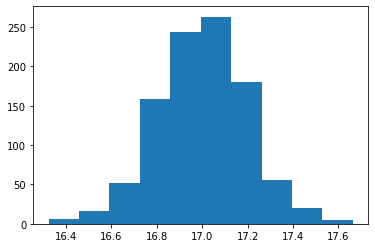

In [28]:
Y, X, H = plt.hist(N, bins=10) # Histogram with 10 bins
plt.show()

Probability density function

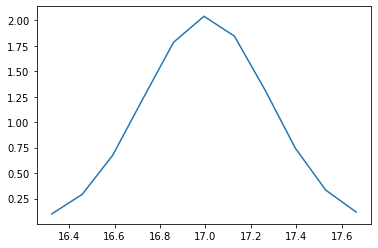

In [29]:
NS = np.std(N) #Standard Deviation value of the 1D array
NM = np.mean(N) #Mean Value of the 1D Array
f = (1/(NS*np.sqrt(2*np.pi)))*np.exp(-((X-NM)/(2*NS))**2) #PDF equation
plt.plot(X, f)
plt.show()

# Third Part

### Task 1

Matrix Initialization:

In [30]:
A = np.array([[2, 5, 1],[4, 3, 7],[1, 3, 2]])
print(A)

[[2 5 1]
 [4 3 7]
 [1 3 2]]


Determinant:

In [31]:
print('Matrix Determinant is:', round(np.linalg.det(A),1))

Matrix Determinant is: -26.0


Trace:

In [32]:
print('Matrix Trace is:', np.trace(A))

Matrix Trace is: 7


Matrix Inverse:

In [33]:
print('Inverse of Matrix A is:\n', np.linalg.inv(A))

Inverse of Matrix A is:
 [[ 0.57692308  0.26923077 -1.23076923]
 [ 0.03846154 -0.11538462  0.38461538]
 [-0.34615385  0.03846154  0.53846154]]


### Task 2

Initialising Matrices B & C:

In [34]:
B= np.array([[4,7,2],[3,2,5],[6,4,3]])
C= np.array([[3,1,9],[7,5,8],[2,1,1]])

Product of matrices B & C:

In [35]:
P = np.matmul(B,C)
print('Product of matrices B & C:\n', P)

Product of matrices B & C:
 [[65 41 94]
 [33 18 48]
 [52 29 89]]


### Task 3

Initialising M & C matrices as a system of linear equations:

In [36]:
M=np.array([[3,2,-1],[2,-1,4],[4,-2,3]])
C=np.array([[25],[19],[18]])

### Task 4

Representing MX=C as the algebraic steps for solving the system:

\begin{equation}
\left(\begin{array}{c}
3 & 2 & -1 \\
2 & -1 & 3 \\
4 & -2 & 3
\end{array}\right)
\left(\begin{array}{c} X \\ Y \\ Z
\end{array}\right) =
\left(\begin{array}{c} 25 \\ 19 \\ 18
\end{array}\right)
\end{equation}

### Task 5

In [37]:
M1 = np.linalg.inv(M) # Inverse of matrix M
X = np.matmul(M1, C) # Inv M by C to get the solution

print(' X =', X[0], '\n', 'Y =', X[1], '\n', 'Z =', X[2])

 X = [5.] 
 Y = [7.] 
 Z = [4.]


Check answer's validity

In [38]:
V = np.allclose(np.dot(M,X), C)
print('Is this solution valid and correct?', V)

Is this solution valid and correct? True


# Fourth Part

### Task 1

Taking three lines from the DLR Lines in London, Available at https://content.tfl.gov.uk/dlr-route-map.pdf

Adding Nodes

In [39]:
City = nx.Graph() #Create an empty graph

#DLR Lines

#Line 1
City.add_node('A', npos=(10,50), ccn='#004225') #Bank
City.add_node('B', npos=(15,35), ccn='#e4d00a') #Shadwell #Shared node etween lines 1 & 2
City.add_node('C', npos=(20,35), ccn='#e4d00a') #Westferry #Shared node etween lines 1 & 2
City.add_node('D', npos=(25,27), ccn='#004225') #Canary Wharf
City.add_node('E', npos=(25,5), ccn='#004225') #Greenwich

#Line 2
City.add_node('F', npos=(10,25), ccn='#2a52be') #Tower Gateway
City.add_node('G', npos=(25,35), ccn='#2a52be') #Poplar
City.add_node('H', npos=(40,35), ccn='#fbcce7') #Canning Town #Shared node between lines 2 & 3
City.add_node('I', npos=(60,35), ccn='#2a52be') #Custom house ExCeL
City.add_node('J', npos=(80,25), ccn='#2a52be') #Beckton

#Line 3
City.add_node('K', npos=(33,80), ccn='#c19a6b') #Stratford International
City.add_node('L', npos=(33,55), ccn='#c19a6b') #West Ham
City.add_node('M', npos=(33,40), ccn='#c19a6b') #Star Lane
City.add_node('N', npos=(62,23), ccn='#c19a6b') #London City Airport
City.add_node('O', npos=(67,17), ccn='#c19a6b') #King George V
City.add_node('P', npos=(70,10), ccn='#c19a6b') #Woolwich Arsenal

Adding Edges

In [40]:
#Line1
City.add_edge('A','B', cce='#004225', distance=2.8)
City.add_edge('B','C', cce='#e4d00a', distance=3.0) #Shared edge between lines 1 & 2
City.add_edge('C','D', cce='#004225', distance=0.8)
City.add_edge('D','E', cce='#004225', distance=3.5)

#Line2
City.add_edge('F','B', cce='#2a52be', distance=1.7)
City.add_edge('C','G', cce='#2a52be', distance=0.7)
City.add_edge('G','H', cce='#2a52be', distance=2.5)
City.add_edge('H','I', cce='#2a52be', distance=1.6)
City.add_edge('I','J', cce='#2a52be', distance=4.0)

#Line3
City.add_edge('K','L', cce='#c19a6b', distance=3.4)
City.add_edge('L','M', cce='#c19a6b', distance=1.0)
City.add_edge('M','H', cce='#c19a6b', distance=0.8)
City.add_edge('H','N', cce='#c19a6b', distance=4.8)
City.add_edge('N','O', cce='#c19a6b', distance=1.0)
City.add_edge('O','P', cce='#c19a6b', distance=3.2)

Initializing Parameters

In [41]:
position = nx.get_node_attributes(City,'npos')
nodecolor = nx.get_node_attributes(City,'ccn')
edgecolor = nx.get_edge_attributes(City,'cce')

Nodes = list(nodecolor.values())
Edges= list(edgecolor.values())

Plotting

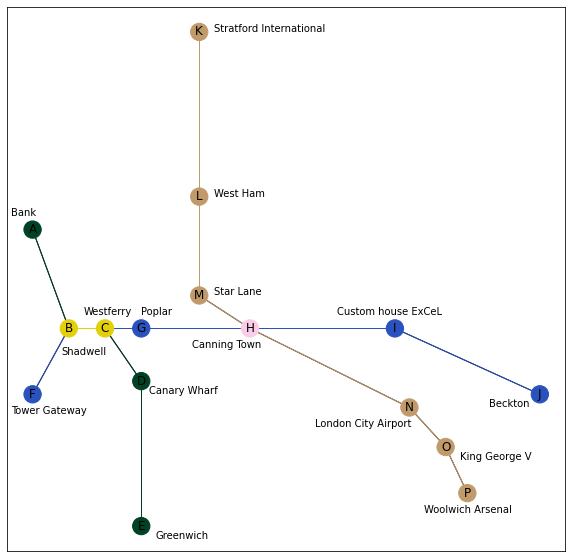

In [42]:
plt.figure(figsize=(10, 10)) #Set the figure size

#Line 1
plt.text(7, 52, 'Bank')
plt.text(14, 31, 'Shadwell')
plt.text(17, 37, 'Westferry')
plt.text(26, 25, 'Canary Wharf')
plt.text(27, 3, 'Greenwich')

#Line 2
plt.text(7, 22, 'Tower Gateway')
plt.text(25, 37, 'Poplar')
plt.text(32, 32, 'Canning Town')
plt.text(52, 37, 'Custom house ExCeL')
plt.text(73, 23, 'Beckton')

#Line 3
plt.text(35, 80, 'Stratford International')
plt.text(35, 55, 'West Ham')
plt.text(35, 40, 'Star Lane')
plt.text(49, 20, 'London City Airport')
plt.text(69, 15, 'King George V')
plt.text(64, 7, 'Woolwich Arsenal')

nx.draw_networkx(City, position, node_color=Nodes)
nx.draw_networkx_edges(City, position, edge_color=Edges)
plt.show()

### Task 2

All data collected from https://en.climate-data.org/

In [43]:
Temp = pd.read_csv('CWHM.csv')

Define the DrawBox function:

In [44]:
def DrawBox(x, y, size, r, g, b):
    if r < 0:
        r = int(0)
    if g < 0:
        g = int(0)
    if b < 0:
        b = int(0)
    if r > 255:
        r = int(255)
    if g > 255:
        g = int(255)
    if b > 255:
        b = int(255)
    for i in range(0, int(size)):
        plt.plot([x, x + size], [y + i, y + i], '#{:02x}{:02x}{:02x}'.format(r, g, b))

Declaring and initializing important variables:

In [45]:
Min = int(min(Temp.min(numeric_only=True)))
Max = int(max(Temp.max(numeric_only=True)))

BoxSize = int(40)
OffsetX = int(15)
OffsetY = int(3)

RowNo = Temp.shape[0] # Number of Rows
ColNo = Temp.shape[1] # Number of Columns

Asking the user to enter the threshold:

In [46]:
Threshold = float (input('Please enter a Threshold in Celesius degrees: '))

Please enter a Threshold in Celesius degrees: 5


Plotting

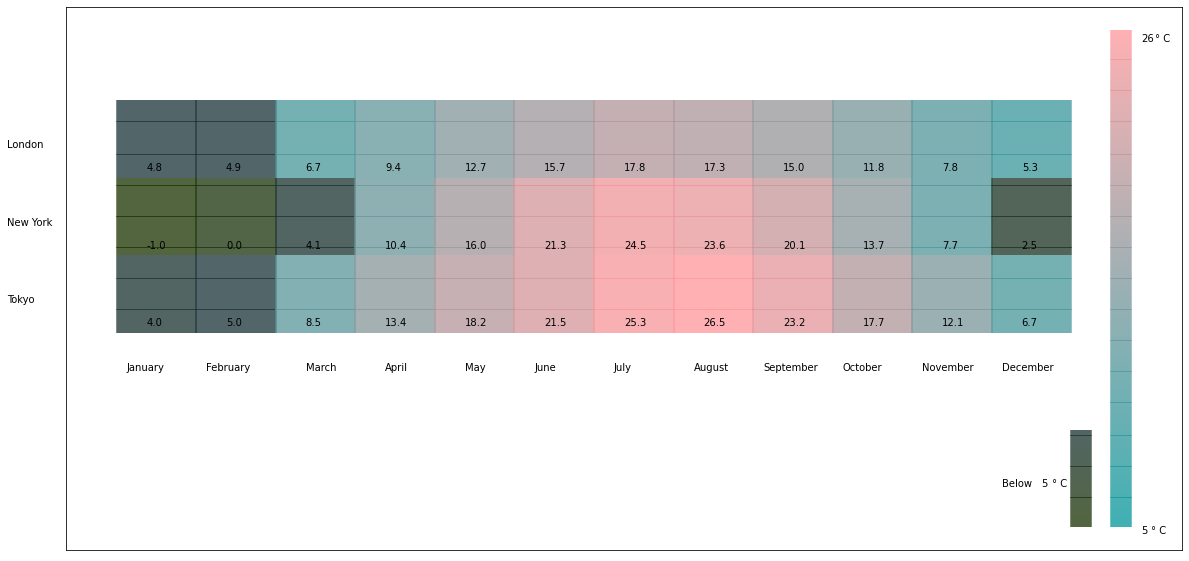

In [47]:
# Setting figure size and removing X & Y labels
plt.figure(figsize=(20, 10))
plt.xticks([])
plt.yticks([])

#Drawing the Heatmap
for i in range(0, RowNo):
    for j in range(1, ColNo):
        ColourCode = int(((Temp.values[i, j]-Min)/(Max-Min))*255)
        plt.text(OffsetX+20+BoxSize*j, OffsetY+300-BoxSize*i, str(Temp.values[i, j]), color='Black')
        # Using the IF statement to draw the HM above and below the user-entered threshold accordingly.
        if (Temp.values[i,j]) > float(Threshold):
            DrawBox(20+BoxSize*j, 300-BoxSize*i, BoxSize, ColourCode, 150, 155)
        else:
            DrawBox(20+BoxSize*j, 300-BoxSize*i, BoxSize, 25, 50, ColourCode)
    
#Set Below Threshold Bar: 
for i in range(0, 50):
    plt.plot([540, 550], [i+ 120 , i +120 ], '#{:02x}{:02x}{:02x}'.format(25, 50, int(i)))
   
plt.text(505,140,'Below')
plt.text(525,140,int(Threshold))
plt.text(530,140,'° C')

#Set Above Threshold Bar:    
for i in range(0, 256):
    plt.plot([560, 570], [i + 120 , i +120 ], '#{:02x}{:02x}{:02x}'.format(int(i), 150, 155))

plt.text(575, 116, int(Threshold)) #Taking the Threshold as a minimum for the color line legend
plt.text(582,370,'° C')
plt.text(580,116,'° C')
plt.text(575, 370, Max)

#Drawing the X-label of the table
plt.text(65 , 200, 'January')
plt.text(105, 200, 'February')
plt.text(155, 200, 'March')
plt.text(195, 200, 'April')
plt.text(235, 200, 'May')
plt.text(270, 200, 'June')
plt.text(310, 200, 'July')
plt.text(350, 200, 'August')
plt.text(385, 200, 'September')
plt.text(425, 200, 'October')
plt.text(465, 200, 'November')
plt.text(505, 200, 'December')

#Drawing the Y-label of the table
plt.text(5, 315, str(Temp.values[0, 0]))
plt.text(5, 275, str(Temp.values[1, 0]))
plt.text(5, 235, str(Temp.values[2, 0]))

plt.show()